<a href="https://colab.research.google.com/github/Pancw2000/Hermite/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
import seaborn as sns

np.random.seed(0)

#Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize examples

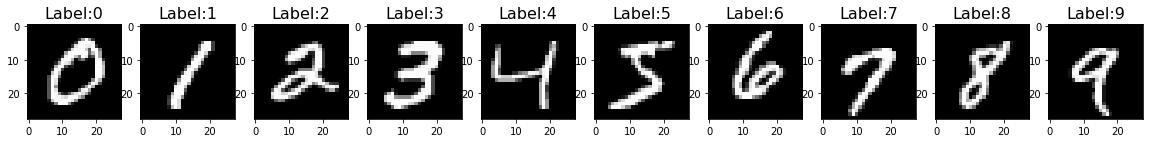

In [ ]:
num_classes = 10
f, ax = plt.subplots(1,num_classes,figsize=(20,20))

for i in range(0,num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title("Label:{}".format(i),fontsize = 16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
#one-hot encoding to make data discrete
y_train_one_hot_encoded = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test_one_hot_encoded = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])
  print(y_train_one_hot_encoded[i])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Prepare Data

In [ ]:
#data normalization [0,255]->[0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#28*28 -> 784 2D->1D array
x_train_reshaped = x_train.reshape(x_train.shape[0],-1)
x_test_reshaped = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 28, 28)


#Build Model

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,),activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25)) 
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.compile(optimizer='adam',loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________



dense 
dropout

**activation** <br>
relu 
softmax
<br>
compile



#Training stage


In [ ]:
batch_size = 512
epochs = 10
model.fit(x=x_train_reshaped, y=y_train_one_hot_encoded, batch_size=batch_size, epochs=epochs)
#why 118/118 instead of 60000/60000? 512*118=60416

Epoch 1/10
118/118 [==============================] - 3s 19ms/step - loss: 0.5943 - accuracy: 0.8253
Epoch 2/10
118/118 [==============================] - 2s 16ms/step - loss: 0.2301 - accuracy: 0.9325
Epoch 3/10
118/118 [==============================] - 2s 18ms/step - loss: 0.1682 - accuracy: 0.9508
Epoch 4/10
118/118 [==============================] - 2s 16ms/step - loss: 0.1333 - accuracy: 0.9608
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1098 - accuracy: 0.9681
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0932 - accuracy: 0.9723
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0802 - accuracy: 0.9757
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0689 - accuracy: 0.9797
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0618 - accuracy: 0.9811
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0554 - accuracy: 0

#Evaluation stage

In [ ]:
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_one_hot_encoded)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_acc))
#313/313 instead of 10000/10000, coz done in batch

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9788
Test loss: 0.06984111666679382, Test accuracy: 0.9787999987602234


In [ ]:
y_pred = model.predict(x_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 1ms/step
[[7.69537382e-06 1.34538905e-05 5.32832288e-04 ... 9.99026358e-01
  7.82355983e-06 3.23402928e-05]
 [6.53216077e-08 5.03054798e-05 9.99933660e-01 ... 1.23660016e-09
  2.55865302e-06 1.84908928e-11]
 [2.33754781e-06 9.98577833e-01 3.06123926e-04 ... 7.17094576e-04
  1.76514382e-04 8.82065342e-06]
 ...
 [7.81725587e-11 1.99453360e-08 1.44732037e-09 ... 9.92801142e-06
  3.08071947e-07 3.32359991e-06]
 [2.27663250e-07 1.19790089e-08 2.94723512e-09 ... 1.29093092e-08
  5.73171885e-04 2.58581565e-08]
 [3.73805076e-09 2.86009671e-11 1.61802974e-10 ... 4.01164087e-14
  1.94155514e-09 2.57570548e-10]]
[7 2 1 ... 4 5 6]


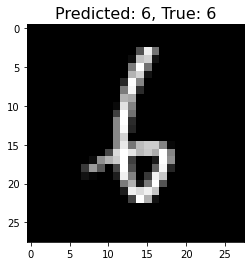

In [ ]:
# random single example
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index] #x_sample is 28*28 2d np matrix

y_sample_true = y_test[random_index] #y_sample_true is a number
y_sample_pred_class = y_pred_classes[random_index] # a number

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')

#Confusion Matrix
*Shows how good your neural network is for each class of hand-written digit.

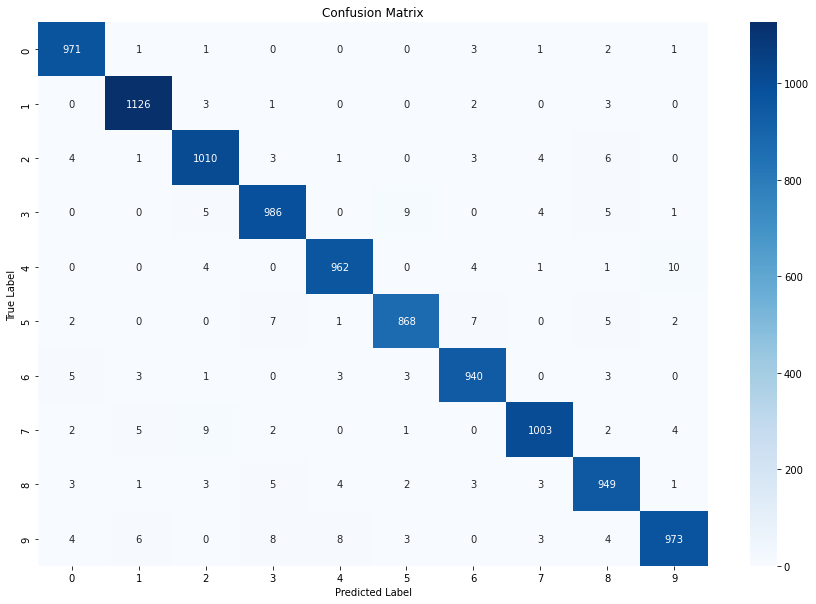

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");



#some errors


In [ ]:
#select the index with wrong result
errors = (y_pred_classes - y_test != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_test_errors = y_test[errors]
x_test_errors = x_test[errors]
# print(y_pred_errors)
# print(y_test_errors)

In [ ]:
# simplified example, helps you to understand code above.
a = np.array([1,2,3,4,5,6,7,8])
b = np.array([1,0,3,4,5,6,7,0])
error_arr = (a - b != 0)
print(error_arr)
a_errors = a[error_arr]
print(a_errors)
b_errors = b[error_arr]
print(b_errors)

[False  True False False False False False  True]
[2 8]
[0 0]


In [ ]:
#try to find the error with the most deviation
y_pred_errors_probability = np.max(y_pred_errors,axis=1) #the brightest neuron(which is predicted wrongly)
y_probability_errors = np.diagonal(np.take(y_pred_errors,y_test_errors, axis=1))
#the brightness of neuron which should be the right answer

brightness_diff = y_pred_errors_probability - y_probability_errors #brightness difference

#sort
sorted_brightness_diff = np.argsort(brightness_diff)
top_brightness_diff = sorted_brightness_diff[-5:]
print(top_brightness_diff)


[202 159 160  81 197]


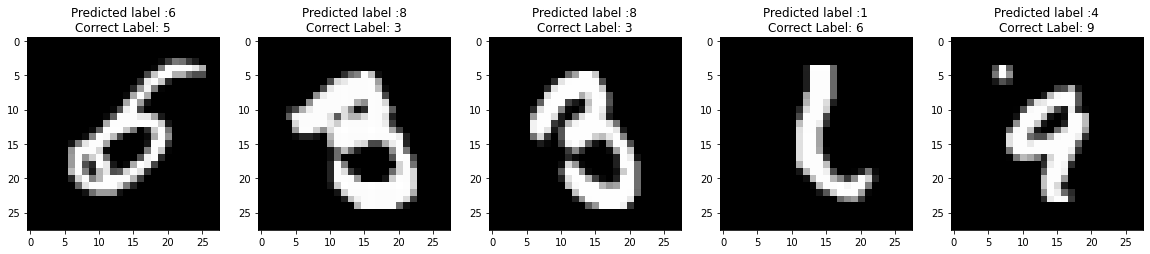

In [ ]:
num = len(top_brightness_diff)
f, ax = plt.subplots(1 ,num, figsize=(20,20))
print(ax)

for i in range(0, num):
  idx = top_brightness_diff[i]
  sample = x_test_errors[idx]
  y_t = y_test_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nCorrect Label: {}".format(y_p, y_t))
